In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
consumerkey = ''
consumersecret = ''
accesstoken = ''
accesstokensecret = ''

In [ ]:
authenticate = tweepy.OAuthHandler(consumerkey, consumersecret)
authenticate.set_access_token(accesstoken, accesstokensecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
posts = api.user_timeline(screen_name = "BillGates", count = 100 , lang = "eng" , tweet_mode = "extended")
print("Show the last 5 tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i+=1

Show the last 5 tweets: 

1) Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. https://t.co/44jYPCZCbt

2) Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. https://t.co/9N0hL2xvTQ

3) Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author @ElizKolbert. https://t.co/ugS31mpJin

4) This new quiz from @Gapminder is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb

5) Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts] , columns = ['Tweets'])
df.head()

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from @Gapminder is a clever way ...
4,Rashida Jones and I talked to Yuval Noah Harar...


In [ ]:
def cleantext(text):
  text = re.sub(r'@[A-Za-z0-9]+' ,'',text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'http?:\/\/\S+', '' , text)
  return text

df['Tweets']= df['Tweets'].apply(cleantext)
df

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from is a clever way to fight m...
4,Rashida Jones and I talked to Yuval Noah Harar...
...,...
95,: Decision-makers can take steps right now to ...
96,"Globally, a lack of medical oxygen–needed to t..."
97,This hero is playing a critical role in Kenya’...
98,: Here's what Juneteenth means to me: https://...


In [ ]:
def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

df

,Tweets,Subjectivity,Polarity
0,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000
1,Here are five books that I’d recommend as we w...,0.600000,0.700000
2,Are we actually making progress on climate cha...,0.150000,0.100000
3,This new quiz from is a clever way to fight m...,0.729293,0.401010
4,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667
...,...,...,...
95,: Decision-makers can take steps right now to ...,0.641534,0.428571
96,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667
97,This hero is playing a critical role in Kenya’...,0.540000,0.020000
98,: Here's what Juneteenth means to me: https://...,0.000000,0.000000


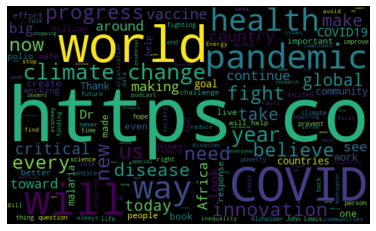

In [ ]:
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state =21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
def getanalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getanalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,Bill Foege and Viktor Zdanov are phenomenal ex...,0.250000,0.250000,Positive
1,Here are five books that I’d recommend as we w...,0.600000,0.700000,Positive
2,Are we actually making progress on climate cha...,0.150000,0.100000,Positive
3,This new quiz from is a clever way to fight m...,0.729293,0.401010,Positive
4,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667,Positive
...,...,...,...,...
95,: Decision-makers can take steps right now to ...,0.641534,0.428571,Positive
96,"Globally, a lack of medical oxygen–needed to t...",0.125000,-0.041667,Negative
97,This hero is playing a critical role in Kenya’...,0.540000,0.020000,Positive
98,: Here's what Juneteenth means to me: https://...,0.000000,0.000000,Neutral


In [ ]:
j = 1
sorteddf = df.sort_values(by = ['Polarity'])
for i in range(0, sorteddf.shape[0]):
  if (sorteddf['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sorteddf['Tweets'][i])
    print()
    j+=1

1)Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. https://t.co/44jYPCZCbt

2)Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. https://t.co/9N0hL2xvTQ

3)Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author . https://t.co/ugS31mpJin

4)This new quiz from  is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb

5)Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one

In [ ]:
j = 1
sorteddf = df.sort_values(by = ['Polarity'], ascending='False')
for i in range(0, sorteddf.shape[0]):
  if(sorteddf['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sorteddf['Tweets'][i])
    print()
    j+=1

1)We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2)Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. https://t.co/O5vXNkghFK

3): Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4): What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5)To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. https://t.co/ogHltYKF9D

6)Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise m

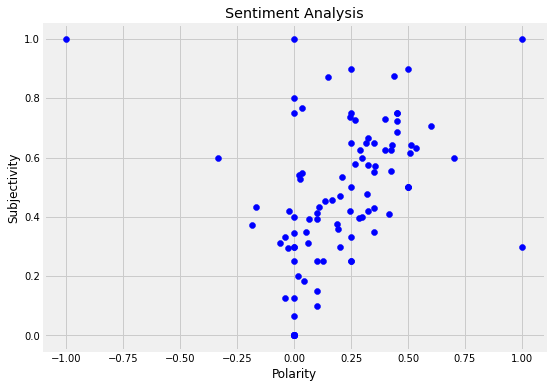

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets["Tweets"]
round(ptweets.shape[0] / df.shape[0]*100, 1)

71.0

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round(ntweets.shape[0] / df.shape[0]*100, 1)

9.0

In [ ]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()